# Wine Quality Dataset

There are two datasets one each for Red Wine and White Wine from the north of Portugal. The goal is to model wine quality based on physicochemical tests. There are 12 attributes for each of the datasets. The Quality is a score between 0 to 10.

Here is the attribute information - 

1.      Fixed Acidity 
2.       Volatile Acidity 
3.      Citric Acid 
4.       Residual Sugar 
5.       Chlorides 
6.       Free Sulphur Dioxides 
7.       Total Sulphur Dioxides 
8.       Density
9.       pH 
10.      Sulphates
11.      Alcohol
12.     **Quality** _Final Class Attribute_


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
dataR = pd.read_csv('winequality-red.csv')
dataW = pd.read_csv('winequality-white.csv')

In [3]:
dataR.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataR.shape

(1599, 12)

In [5]:
dataR.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Check the unique values in Quality column
dataR['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

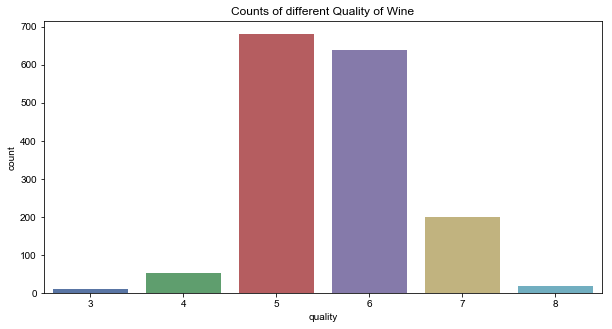

In [7]:
plt.subplots(figsize=(10,5))
plt.title("Counts of different Quality of Wine")
sea.set(style="darkgrid")
sea.countplot(x="quality", data=dataR)

We see that for Red Wines, most of them have been categorized as Quality 5 and Quality 6 and none of them have been given the highest rating of 10. We will now try to see the correlation among the different features using a heatmap.

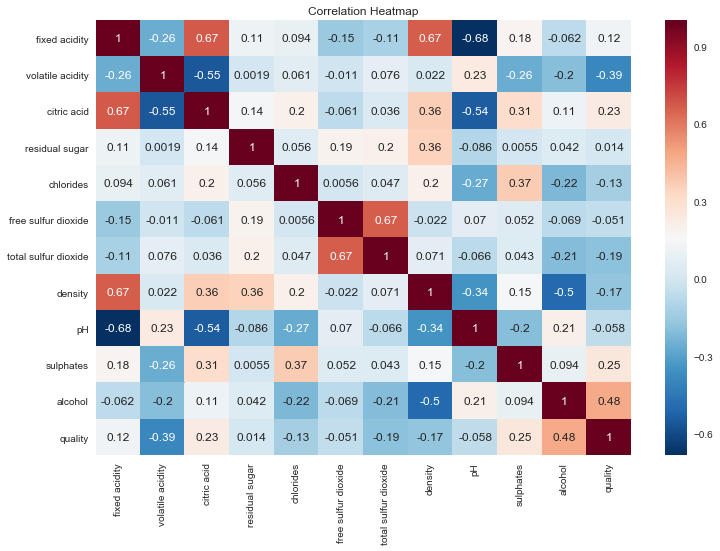

In [8]:
correlationR = dataR.corr()
plt.figure(figsize=(12,8))
plt.title("Correlation Heatmap")
sea.heatmap(correlationR, annot=True, cmap="RdBu_r")

In the heatmap, the cells with the deep red shows a higher correlation with the X and the Y axis and the ones with the deep blue shows a low correlation. Since we are much more interested in the Quality, we will see the how the different features are correlated with it.

In [9]:
correlationR['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

_Alcohol, Sulphates, Citric Acid_ and _Fixed Acidity_ has much more correlation with Quality. So, we will analyse these features with quality and check for any abnormalities or _outliers_ using the boxplot feature of Seaborn.

Along with it we will create a new feature called Type based on Quality which will label the wines as Poor, Average and Good. The conditions to be followed are 
1. Poor - Quality less than 4
2. Average - Quality between 5 and 6
3. Good - Quality from 7 to 10.

In [10]:
condition = [ dataR['quality'] >=7, dataR['quality'] <= 4]
types = ['good','poor']
dataR['rating'] = np.select(condition, types, default='average')
dataR['rating'].value_counts()

average    1319
good        217
poor         63
Name: rating, dtype: int64

What we are looking at is two different types of Machine Learning approaches. In one of them we will _classify_ the wines on whether they are poor, average or good. Secondly we will try to predict the quality of the wines i.e we will assign them a _Quality_ score.

## Data Visualisation

### 1. Alcohol and Wine Quality

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Quality'),
 Text(0.5,1,'Alcohol % in Wine Quality')]

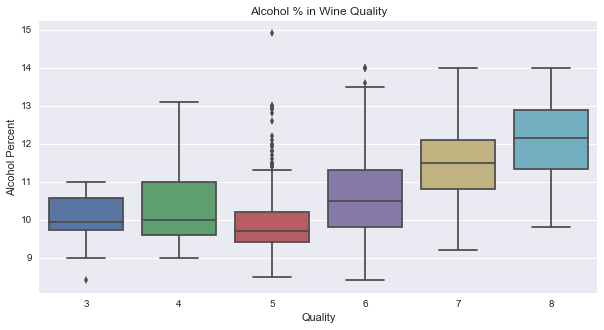

In [11]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="quality", y="alcohol", data = dataR)
fg.set(xlabel="Quality", ylabel="Alcohol Percent", title="Alcohol % in Wine Quality")

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Alcohol % and Wine Rating')]

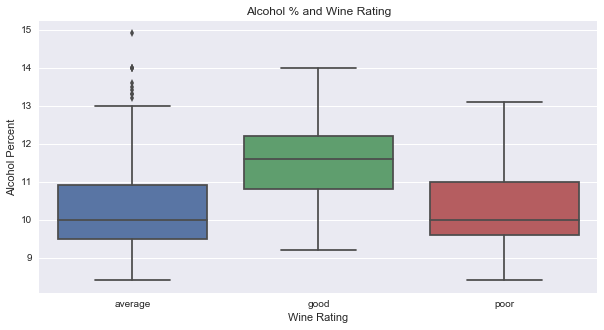

In [12]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="rating", y="alcohol", data = dataR)
fg.set(xlabel="Wine Rating", ylabel="Alcohol Percent", title="Alcohol % and Wine Rating")

Good wines have a higher alcohol percent in them while the Average Wines have some extreme values of Alcohol percentage.

### 2. Sulphates and Wine Quality

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Quality'),
 Text(0.5,1,'Sulphates in Wine Quality')]

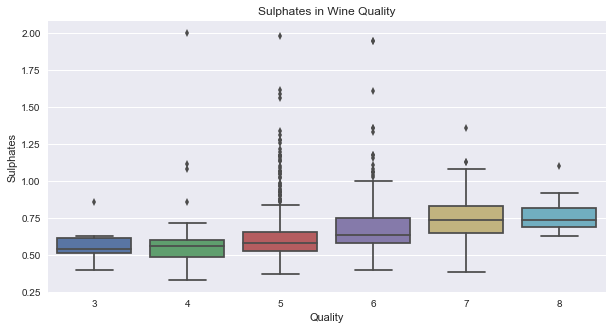

In [13]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="quality", y="sulphates", data = dataR)
fg.set(xlabel="Quality", ylabel="Sulphates", title="Sulphates in Wine Quality")

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Sulphates and Wine Rating')]

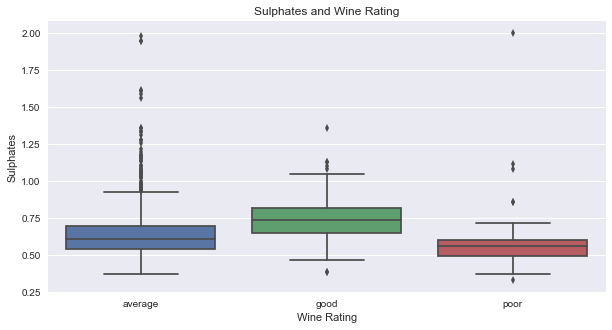

In [14]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="rating", y="sulphates", data = dataR)
fg.set(xlabel="Wine Rating", ylabel="Sulphates", title="Sulphates and Wine Rating")

Average Wines have a lot of extreme values of Sulpahtes in them and their their quartile range is also larger than it's first quartile. The Good Wines have a more balanced outlook and the maximum quantity of sulphates is lesser than 1.5. Poor Wines have the least mean value of sulphates.

### 3. Citric Acid and Wine Quality

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Quality'),
 Text(0.5,1,'Citric Acid in Wine Quality')]

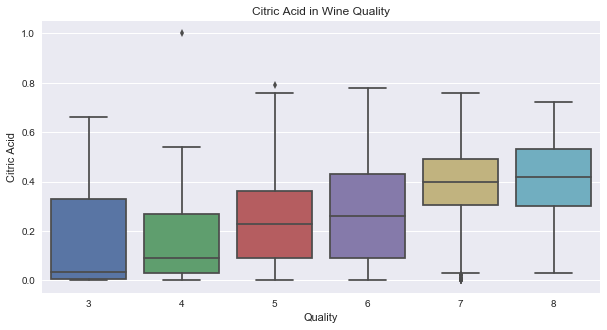

In [15]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="quality", y="citric acid", data = dataR)
fg.set(xlabel="Quality", ylabel="Citric Acid", title="Citric Acid in Wine Quality")

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Citric Acid and Wine Rating')]

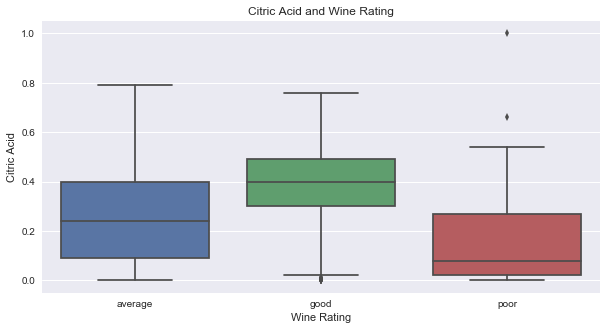

In [16]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="rating", y="citric acid", data = dataR)
fg.set(xlabel="Wine Rating", ylabel="Citric Acid", title="Citric Acid and Wine Rating")

Poor quality of wines have a low value of citric acid in them. The Good Wines have a higher value of the acid.

### 4. Fixed Acidity

[Text(0,0.5,'Fixed Acidity'),
 Text(0.5,0,'Quality'),
 Text(0.5,1,'Fixed Acidity in Wine Quality')]

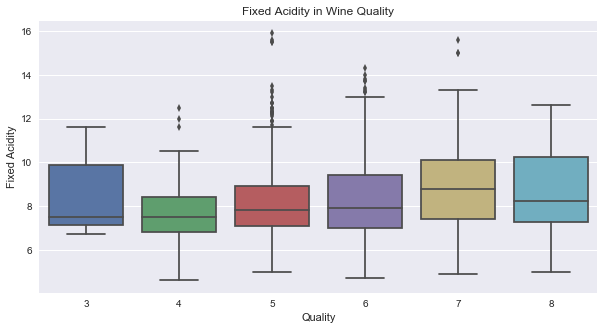

In [17]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="quality", y="fixed acidity", data = dataR)
fg.set(xlabel="Quality", ylabel="Fixed Acidity", title="Fixed Acidity in Wine Quality")

[Text(0,0.5,'Fixed Acidty'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Fixed Acidty and Wine Rating')]

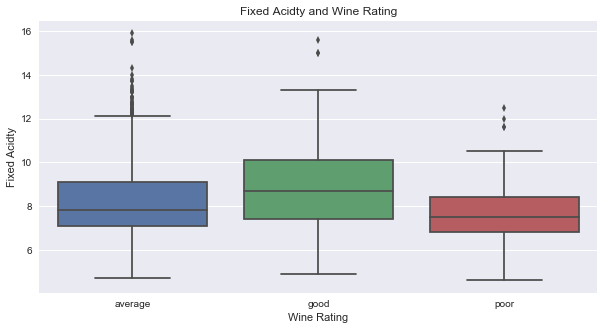

In [18]:
plt.figure(figsize=(10,5))
fg = sea.boxplot(x="rating", y="fixed acidity", data = dataR)
fg.set(xlabel="Wine Rating", ylabel="Fixed Acidty", title="Fixed Acidty and Wine Rating")

## Machine Learning

In Machine Learning, we will first split the dataset into training set and testing set in the 70/30 ratio. Then we will apply and fit different models for classification and regression to the training set. 

For classification we will use Principal Component Analysis (PCA) to reduce the dimensionality of the data. For this we need to first scale the data and then apply dimensionality reduction on the dataset. We will apply ```StandardScaler()``` to scale and then transform the dataset. This function is used so that we have the knowledge of the subspace that it will be projected onto i.e the train data.

For Classification we will be using the following - 
1. Logistic Regression
2. Support Vector Machine
3. K Nearest Neighbours
4. Random Forest
5. Naive Bayes

For Regression we will be using the following - 
1. Linear Regression - Least Squares and LassoCV
2. Random Forest

In [19]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegressionCV #Logistic and Linear
from sklearn.svm import SVC #Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier #K-Neighbours Classifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor #Random Forest Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.model_selection import cross_val_score, KFold, train_test_split #Cross Validation score, K Fold, Train Test Split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #Scaling for PCA

For dimentionality reduction we are now going to first scale the features needed for PCA. Then apply PCA on _all the features_ to find the cumulative variance of the features and plot to find the _reduced features_ to use.

In [20]:
dataRX = dataR.iloc[:,:11] #selecting only the features without the Quality and the Rating
dataRY = dataR.iloc[:,11:13] #selecting the Y components

Text(0.5,1,'Cumulative Variance vs Features')

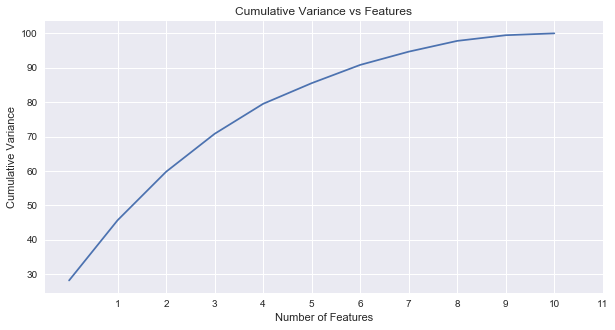

In [21]:
scale_feat = StandardScaler()
dataRX_sc = scale_feat.fit_transform(dataRX)

pca = PCA()
dataR_pca = pca.fit_transform(dataRX_sc)

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Variance")
plt.title("Cumulative Variance vs Features")

So, selecting 8 features gives us more than 95% of the variance. This is better than the 11 features originally in the dataset. 

Let us now create the new PCA with the 8 features.

In [22]:
pca_final = PCA(n_components=8)
dataR_final = pca_final.fit_transform(dataRX_sc)

We will now split the dataset into training set and test set in the 75-25 ratio.

In [23]:
trainX, testX, trainY, testY = train_test_split(dataRX_sc, dataRY, test_size=0.25)

In [24]:
print("Training Set size - {0}" .format(trainX.shape))
print("Testing Set size - {0}" .format(testX.shape))

Training Set size - (1199, 11)
Testing Set size - (400, 11)


### 1. Classification
#### 1.1 Logistic Regression

We are doing nested cross validation by using the LogisticRegressionCV

In [25]:
model = LogisticRegressionCV(cv=3)
model.fit(trainX,trainY[['rating']].values.ravel())

predictY = model.predict(testX)

scores = cross_val_score(model, testX, testY[['rating']].values.ravel(), cv=8)
print("Accuracy of the model using Logistic RegressionCV (cv=3) (folds=8 for cross_val) is {0}\n".format(scores.mean()))
print("Classification Report\n---------------------------\n")
print(metrics.classification_report(testY[['rating']],predictY))

Accuracy of the model using Logistic RegressionCV (cv=3) (folds=8 for cross_val) is 0.8227130852340936

Classification Report
---------------------------

             precision    recall  f1-score   support

    average       0.83      0.97      0.90       327
       good       0.50      0.17      0.25        53
       poor       0.00      0.00      0.00        20

avg / total       0.75      0.82      0.77       400



c:\users\soham banerjee\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression CV throws some interesting results for us which deserves an explaination.

The accuracy evaluated using ```cross_val_score``` comes out to be 83.26%. Meaning that this model will predict correctly for 81.29%. This leaves a lot to be done regarding the rest _misclassifacation_.

Observing the Classification Report, we see how this model predicts the different class types or Wine Ratings. Average Wines are fare better with 85%, Good Wines scores a dismal 67% only while this model couldn't predict the accuracy of Poor Wines! The warning message given later gives some understanding behind this.

_There are labels with no predicted samples._ This wasn't completely unexpected considering that there are only 19 samples of Poor Wines in the dataset which was trained and tested upon. Good Wines too suffer from this handicap with merely 68 samples. Maybe having a larger dataset with more labels would have given us better results.

#### 1.2 Support Vector Machine

In [26]:
model = SVC()
model.fit(trainX,trainY[['rating']].values.ravel())

predictY = model.predict(testX)

scores = cross_val_score(model, testX, testY[['rating']].values.ravel(), cv=8)
print("Accuracy of the model using Support Vector Classifier is {0}\n".format(scores.mean()))
print("Classification Report\n---------------------------\n")
print(metrics.classification_report(testY[['rating']],predictY))

Accuracy of the model using Support Vector Classifier is 0.8152601040416165

Classification Report
---------------------------

             precision    recall  f1-score   support

    average       0.85      0.99      0.91       327
       good       0.79      0.28      0.42        53
       poor       0.00      0.00      0.00        20

avg / total       0.80      0.84      0.80       400



c:\users\soham banerjee\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Performs almost similar to Logistic Regression with 83.04% but again doesn't classify Poor Wines.

#### 1.3 K Nearest Neighbours

In [27]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(trainX,trainY[['rating']].values.ravel())

predictY = model.predict(testX)

scores = cross_val_score(model, testX, testY[['rating']].values.ravel(), cv=8)
print("Accuracy of the model using KNN Classifier is {0}\n".format(scores.mean()))
print("Classification Report\n---------------------------\n")
print(metrics.classification_report(testY[['rating']],predictY))

Accuracy of the model using KNN Classifier is 0.8425190076030412

Classification Report
---------------------------

             precision    recall  f1-score   support

    average       0.85      0.97      0.91       327
       good       0.68      0.36      0.47        53
       poor       0.00      0.00      0.00        20

avg / total       0.79      0.84      0.80       400



KNN is not better than the two. 81.5% accuracy. Average wines continue to perform better.

#### 1.4 Random Forest Classifier

In [28]:
model = RandomForestClassifier(n_estimators = 50, max_features='sqrt', criterion='entropy')
model.fit(trainX,trainY[['rating']].values.ravel())

predictY = model.predict(testX)

scores = cross_val_score(model, testX, testY[['rating']].values.ravel(), cv=8)
print("Accuracy of the model using Random Forest Classifier is {0}\n".format(scores.mean()))
print("Classification Report\n---------------------------\n")
print(metrics.classification_report(testY[['rating']],predictY))

Accuracy of the model using Random Forest Classifier is 0.82046843737495

Classification Report
---------------------------

             precision    recall  f1-score   support

    average       0.86      0.98      0.92       327
       good       0.78      0.40      0.53        53
       poor       1.00      0.05      0.10        20

avg / total       0.86      0.86      0.83       400



83.03% accuracy. Random Forest is performing same as Logistic Regression and Support Vector Machine.

#### 1.5 Naive Bayes

In [29]:
model = GaussianNB()
model.fit(trainX,trainY[['rating']].values.ravel())

predictY = model.predict(testX)

scores = cross_val_score(model, testX, testY[['rating']].values.ravel(), cv=8)
print("Accuracy of the model using Gaussian Naive Bayes Classifier is {0}\n".format(scores.mean()))
print("Classification Report\n---------------------------\n")
print(metrics.classification_report(testY[['rating']],predictY))

Accuracy of the model using Gaussian Naive Bayes Classifier is 0.7730504701880752

Classification Report
---------------------------

             precision    recall  f1-score   support

    average       0.90      0.86      0.88       327
       good       0.51      0.77      0.62        53
       poor       0.14      0.05      0.07        20

avg / total       0.81      0.81      0.81       400



The poorest of all. Only 70.81% accuracy. Naive Bayes performed better when PCA wasn't applied. It had a score of greater than 80%.

### 2. Regression

As mentioned above, for regression we will only use the top 4 features which are highly correlated with Quality i.e Alcohol, Citric Acid, Sulphates and Fixed Acidity. The dataset will again be split in the 75-25 ratio since we do not need the features to be scaled.

The predictions will rounded down using Numpy's ```floor()``` function to get a whole value.

Scoring strategy used will be Mean Absolute Squared Error. Here lesser the negative value, lesser is the error in prediction.

In [30]:
trainX1, testX1, trainY1, testY1 = train_test_split(dataRX, dataRY, test_size=0.25)

In [31]:
print("Training Set size - {0}" .format(trainX1.shape))
print("Testing Set size - {0}" .format(testX1.shape))

Training Set size - (1199, 11)
Testing Set size - (400, 11)


In [32]:
trainX = trainX1[['alcohol','sulphates','citric acid','fixed acidity', 'residual sugar']]
trainY = trainY1[['quality']].values #Regression

testX = testX1[['alcohol','sulphates','citric acid','fixed acidity', 'residual sugar']]
testY = testY1[['quality']].values #Regression

#### 2.1 Linear Regression - Least Squares

In [33]:
model = LinearRegression()
model.fit(trainX,trainY)

predictY = np.floor(model.predict(testX))

scoring = 'neg_mean_absolute_error'
scores = cross_val_score(model, testX, testY, cv=8,scoring=scoring)
sc = scores.mean()
print("Accuracy of the model using Linear Regression (Least Squares) is {0}\n".format(sc))
print("Positive Score is {0}%".format(abs(sc)*100))

Accuracy of the model using Linear Regression (Least Squares) is -0.5236766843054641

Positive Score is 52.36766843054641%


#### 2.2 Linear Regression - LassoCV

In [34]:
model = LassoCV(cv=3)
model.fit(trainX,trainY.ravel())

predictY = np.floor(model.predict(testX))

scoring = 'neg_mean_absolute_error'
scores = cross_val_score(model, testX, testY.ravel(), cv=10,scoring=scoring)
sc = scores.mean()
print("Accuracy of the model using Linear Regression (LassoCV) is {0}\n".format(sc))
print("Positive Score is {0}%".format(abs(sc)*100))

Accuracy of the model using Linear Regression (LassoCV) is -0.5275215833774115

Positive Score is 52.75215833774115%


#### 2.3 Random Forest Regression

In [35]:
model = RandomForestRegressor(n_estimators = 50, max_features='sqrt')
model.fit(trainX,trainY.ravel())

predictY = np.floor(model.predict(testX))

scoring = 'neg_mean_absolute_error'
scores = cross_val_score(model, testX, testY.ravel(), cv=10,scoring=scoring)
sc = scores.mean()
print("Accuracy of the model using Random Forest Regressor is {0}\n".format(sc))
print("Positive Score is {0}%".format(abs(sc)*100))

Accuracy of the model using Random Forest Regressor is -0.5167999999999999

Positive Score is 51.67999999999999%


## Conclusion

This dataset has more average quality wines than good and poor. So, the classification becomes difficult based on how we are classifying the wines.

For regression, we see that Lasso CV gives us less error as compared to others.

For future, we can test out even more different algorithms like Gradient Boosting, Support Vector Regressor.